<a href="https://colab.research.google.com/github/loureenvalyne/python-lessons/blob/main/Covariance_and_Correlation_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covariance and Correlation - Lab

## Introduction

In this lab, you will calculate covariance and correlation for some data in Python lists by using the formulas shown in the previous lesson.

## Objectives

You will be able to:

- Calculate covariance and correlation  
- Declare and use a function with arguments   


## The Data

The two variables include 20 heights (in inches) and weights (in pounds). This will help us focus more on seeing covariance and correlation in action!

At this point, you should be able to calculate the average height and average weight. You can also explain the medians, variances, and standard deviations for this dataset.

But all of those measurements are only concerned with a **single variable**. Now that we have both heights and weights, we want to perform statistical analysis for **multiple variables**. In this lab, you'll answer the following questions:

1. Is there a linear relationship between weight an height?
2. Does weight increase as height increases?
3. How strong is the linear relationship between weight and height?

There are always exceptions, but when you look at the population in general, taller people will tend to weigh more than shorter people. While you should *always* be cautious when generalizing, generalization of information can be very useful as it shows you a bigger picture that you can build your intuitions upon. This is also what a lot of core statistical principles are built upon.

First, run the below cells to load the heights and weights into memory.

In [1]:
# Run this cell without changes
height = [68, 71, 61, 69, 71, 58, 72, 73, 58, 74,
          61, 59, 69, 68, 64, 69, 72, 66, 65, 69]
weight = [165, 201, 140, 170, 192, 125, 195, 205,
          115, 210, 135, 125, 172, 175, 145, 170,
          200, 155, 150, 171]

## Calculating the Covariance

In the previous lesson, we used this formula to represent population covariance:

$$\sigma_{XY} = \dfrac{1}{n}\displaystyle\sum_{i=1}^{n}(x_i -\mu_x)(y_i - \mu_y)$$

In this lab, we will be using the sample version of the formula, because of the assumption that this particular data is a _sample of a bigger population_. The bigger population here could be the entire world population. Here is this version of the formula:

$$cov (X,Y) = \frac{1}{n-1}\displaystyle\sum_{i=1}^{n}(x_i -\bar x)(y_i - \bar y)$$

This is mostly the same formula, with two differences:

1. Instead of $\mu_x$ and $\mu_y$ (the means for _populations_ $X$ and $Y$), we have $\bar x$ and $\bar y$, which are the means for _samples_ $X$ and $Y$. In both cases, the mean is the sum of the values divided by the count of the values.
2. We divide by $(n-1)$ here, instead of dividing by $n$. As with the differences in calculating variance and standard deviation for a *population* and a *sample*:
    - When calculating for a *population*, we would divide by $n$
    - When calculating for a *sample* (as we are now), we divide by $n-1$

These parts of the formula are the same:

- $x_i$ = ith element of variable $X$
- $y_i$ = ith element of variable $Y$
- $n$ = number of data points ($n$ must be same for $X$ and $Y$)

### Mean Normalization

Looking at the formula of covariance, you'll notice that it is composed of $(x_i -\bar x)$ and $(y_i -\bar y)$. These are also known as the **mean normalized** variables $X$ and $Y$. The idea is that you take each element in $X$ and $Y$ and respectively subtract the mean of $X$ and $Y$. The result is that your altered ("normalized") $X$ and $Y$ now have mean 0.

So how do you do this? You can write a function that takes in a list, calculates the mean of this list, and returns a new list containing each element minus the calculated mean value. This will be used to calculate $(x_i -\bar x)$ and $(y_i -\bar y)$.

In [5]:
# Replace None with appropriate code

def mean_normalize(var):
    # Initialize a list for storing normalized values
    normalized_values = []

    # Calculate the mean of var
    mean_value = sum(var)/len(var)

    # For each element in var, subtract the mean and add the result to the new list
    normalized_values = [x - mean_value for x in var]

    # Return the new list
    return normalized_values

mean_normalize([1, 2, 3, 4, 5]), mean_normalize([11, 22, 33, 44, 55])
# ([-2.0, -1.0, 0.0, 1.0, 2.0], [-22.0, -11.0, 0.0, 11.0, 22.0])

([-2.0, -1.0, 0.0, 1.0, 2.0], [-22.0, -11.0, 0.0, 11.0, 22.0])

Great! You'll see that our function maintains the _variance_ of list elements and moves the mean to zero. As a quick test, you can visualize what exactly happens to the data with mean normalization.

Use the `mean_normalize()` function to create a new variable `height_normalized` to be used in the plotting code below.

In [6]:
# Mean normalize the height (replace None with appropriate code)
height_normalized = mean_normalize(height)
height_normalized

[1.1500000000000057,
 4.150000000000006,
 -5.849999999999994,
 2.1500000000000057,
 4.150000000000006,
 -8.849999999999994,
 5.150000000000006,
 6.150000000000006,
 -8.849999999999994,
 7.150000000000006,
 -5.849999999999994,
 -7.849999999999994,
 2.1500000000000057,
 1.1500000000000057,
 -2.8499999999999943,
 2.1500000000000057,
 5.150000000000006,
 -0.8499999999999943,
 -1.8499999999999943,
 2.1500000000000057]

Now, run the cell below to visualize the data before and after mean normalization.

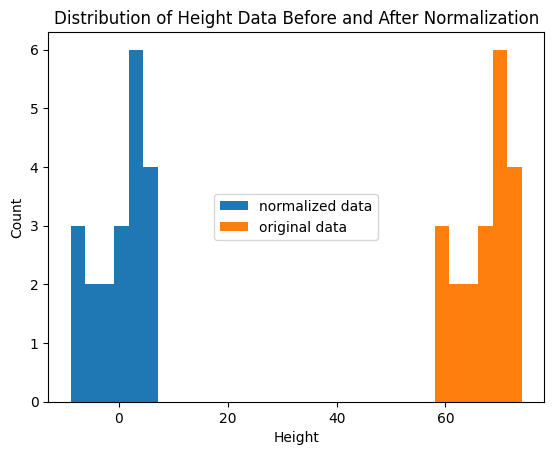

In [7]:
# Run this cell without changes
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

ax.hist(height_normalized, label="normalized data", bins=6)
ax.hist(height, label="original data", bins=6)

ax.set_title("Distribution of Height Data Before and After Normalization")
ax.set_xlabel("Height")
ax.set_ylabel("Count")

ax.legend(loc="center");

In [9]:
weight_normalized = mean_normalize(weight)
weight_normalized

[-0.8000000000000114,
 35.19999999999999,
 -25.80000000000001,
 4.199999999999989,
 26.19999999999999,
 -40.80000000000001,
 29.19999999999999,
 39.19999999999999,
 -50.80000000000001,
 44.19999999999999,
 -30.80000000000001,
 -40.80000000000001,
 6.199999999999989,
 9.199999999999989,
 -20.80000000000001,
 4.199999999999989,
 34.19999999999999,
 -10.800000000000011,
 -15.800000000000011,
 5.199999999999989]

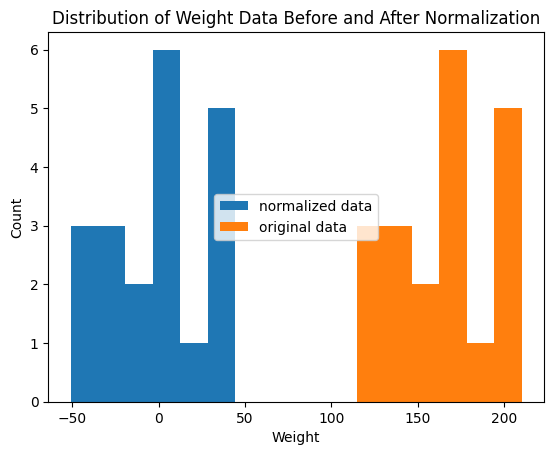

In [10]:
fig, bx = plt.subplots()

bx.hist(weight_normalized, label="normalized data", bins=6)
bx.hist(weight, label="original data", bins=6)

bx.set_title("Distribution of Weight Data Before and After Normalization")
bx.set_xlabel("Weight")
bx.set_ylabel("Count")

bx.legend(loc="center");

There you go! The _shape_ of the data isn't changed, but the mean is just shifted! You can also try this for the `weight` variable if you wish.

### The Dot Product
Now that you know how to normalize the variables `height` and `weight` (i.e. $(x_i -\mu_x)$ and $(y_i - \mu_y)$ in math notation) it's time to take the _dot product_ of these two normalized variables in order to find $\sum_{i=1}^{n}(x_i -\mu_x)(y_i - \mu_y)$.

> A dot product is a linear algebraic operation that takes two equal-length sequences of numbers and returns a single number which can be used as a measure of similarity between these sequences (also known as vectors).

[Here is a great article explaining this in detail](https://betterexplained.com/articles/vector-calculus-understanding-the-dot-product/).

For two vectors `a` and `b`, a dot product is calculated by multiplying each element of one vector to its counterpart in the second, and then adding them up together. Imagine you want to take the dot product of two variables `a` and `b`:

```
 a[0] * b[0] + a[1] * b[1] + a[2] * b[2] ...

```

Let's write a function that takes two iterables and returns their dot product.

In [11]:
# Replace None with appropriate code

def dot_product(x, y):
    # Check if the two iterables have the same length
    if len(x) != len(y):
        raise ValueError("Both iterables must have the same length.")
    # Calculate the dot product
    product_sum = sum(x * y for x, y in zip(x, y))

    return product_sum

a = [1, 2, 3]
b = [4, 5, 6]

dot_product(a,b)
#  32, calculated as (1*4 + 2*5 + 3*6)

32

If you apply `mean_normalize` then `dot_product`, you have $\sum_{i=1}^{n}(x_i -\mu_x)(y_i - \mu_y)$ (the numerator of the covariance formula).

Now that have the numerator of the formula sorted out, let's finally write a function `covariance()` that takes the `height` and `weight` lists and returns the covariance value using the functions you created earlier.

To accomplish this, apply `mean_normalize` and `dot_product`, and divide the whole thing by $n-1$ in order to get the covariance:

$$\frac{1}{n-1}\displaystyle\sum_{i=1}^{n}(x_i -\bar x)(y_i - \bar y)$$

In [15]:
# Replace None with appropriate code

def covariance(x, y):
    # Mean normalize both lists
    x_norm = mean_normalize(height)
    y_norm = mean_normalize(weight)

    # Calculate the numerator
    numerator = dot_product(x_norm, y_norm)
    n=len(x_norm)

    # Divide the numerator by n - 1 and return
    return numerator/(n-1)


covariance(height, weight)
# 144.75789473684208

144.75789473684208

So, we have a covariance of about 144.8. Recall the questions posed at the beginning:

1. Is there a linear relationship between weight an height?
2. Does weight increase as height increases?
3. How strong is the linear relationship between weight and height?

Before looking at the answer below, try to identify: **Which (if any) questions can we answer with this covariance value?**

.

.

.

*Answer: we can answer questions 1 and 2.*

 - Because the covariance is not (close to) zero, we can say that there ***is*** a linear relationship between weight and height.
 - Because the covariance is positive rather than negative, we can say that in general, yes, weight increases as height increases.

So far, we cannot give a clear answer to question 3, because the scale of the covariance is based on the units of measurement in this data (inches and pounds, in this case).

While the covariance can be used to figure out *in which direction* two variables have a linear relationship — does one increase while the other decreases, or vice versa — any conclusion we might draw about the *strength* of the linear relationship from the covariance would be an artifact of these particular units.

If we want to make a generalized claim about the strength of the relationship in order to compare it to measurements using different units (e.g. height and resting heart rate), we need a measure that compares like units with like units. **Correlation** (specifically Pearson correlation) converts the units of each variable to "units of standard deviation" and standardizes the scale of the resulting calculation from -1 to 1, allowing us to make claims about the strength of the relationship that are not tied to the original measurement units.

In order to answer question 3, let's calculate the correlation.

## Calculating the Correlation

In the previous lesson, we used this formula to represent population correlation:

$$ r = \frac{\sum_{i=1}^{n}(x_i -\mu_x)(y_i - \mu_y)} {\sqrt{\sum_{i=1}^{n}(x_i - \mu_x)^2 \sum_{i=1}^{n}(y_i-\mu_y)^2}}$$

Now we'll use this version to calculate the sample correlation:

$$ r = \frac{\sum_{i=1}^{n}(x_i -\bar x)(y_i - \bar y)} {\sqrt{\sum_{i=1}^{n}(x_i - \bar x)^2 \sum_{i=1}^{n}(y_i-\bar y)^2}}$$

Again, we are using $\bar y$ and $\bar x$ to represent sample means rather than $\mu_x$ and $\mu_y$ to represent population means.

The numerator of correlation is the covariance:

$$\frac{1}{n-1}\displaystyle\sum_{i=1}^{n}(x_i -\mu_x)(y_i - \mu_y)$$

And the denominator of correlation is the standard deviation of $X$ times the standard deviation of $Y$:

$$\sqrt{\frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})^2} * \sqrt{\frac{1}{n-1} \sum_{i=1}^{n}(y_i - \bar{y})^2}$$

(The complete formula looks a bit different because the $\frac{1}{n-1}$ is canceled out, and the square root is applied to both x and y at once.)

Let's use this helper function to calculate the standard deviation:

In [16]:
# Run this cell without changes
from math import sqrt

def stddev(var):
    mean = sum(var)/len(var)

    sum_of_squares = 0
    for i in var:
        sum_of_squares += (i - mean)**2

    n = len(var)
    variance = sum_of_squares / (n - 1)
    return sqrt(variance)

stddev(height)
# 5.112162998801562

5.112162998801562

Now, use the functions `covariance()` and `stddev()` to define a function, `correlation()` that calculates the correlation between two lists.

In [18]:
# Calculate correlation between two variables using formula above
# Replace None with appropriate code

def correlation(x, y):
    # Find the numerator (covariance)
    numerator = covariance(x, y)

    # Find standard deviations of both lists
    s_x = stddev(x)
    s_y = stddev(y)

    # Return numerator divided by multiplied standard deviations
    return numerator/(s_x*s_y)


correlation(height, weight)
# 0.9773995748246297

0.9773995748246297

A correlation of 0.98, that's very close to 1! That means we can answer question 3: there is a **very strong** linear relationship between height and weight — at least for this particular sample.

That's one of the key takeaways, that sample size plays a major rule in determining the nature of a variable and its relationship with other variables. The set of 20 records used we seem to correlate highly, but if you look at 20 other people, you'll see that this result will be different. The correlation here will depend on the *sample*, and you'll see that this will differ more clearly when working with smaller samples.

(_Note:_ A correlation of a variable with itself is always equal to 1.)

A scatter plot of this sample of height and weight aligns well with this finding of a strong correlation:

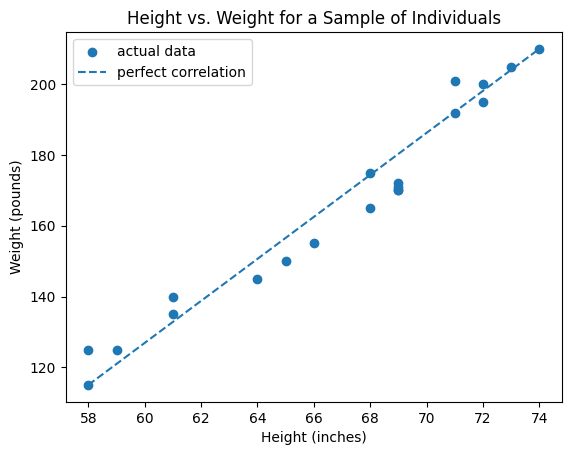

In [19]:
# Run this cell without changes

fig, ax = plt.subplots()

ax.scatter(height, weight, label="actual data")

x_bounds = [min(height), max(height)]
y_bounds = [min(weight), max(weight)]

ax.plot(x_bounds, y_bounds, "--", label="perfect correlation")

ax.set_title("Height vs. Weight for a Sample of Individuals")
ax.set_xlabel("Height (inches)")
ax.set_ylabel("Weight (pounds)")

ax.legend();

## Simplifying the Process with NumPy

The goal of this exercise was for you to develop a deeper understanding of these statistics and to practice writing Python functions.

In a professional data science setting, you would not write these functions by hand, you would use a library to compute these statistics quickly and easily. Here, we'll use NumPy.

In [20]:
# Run this cell without changes
import numpy as np

### Covariance with NumPy

In [21]:
# Run this cell without changes
# NumPy calculates cov(height, height), cov(height, weight), cov(weight, height), and cov(weight, weight)
# We only need height vs. weight so we extract just that value
covariance_matrix = np.cov(height, weight)
covariance_matrix[0][1]

144.75789473684205

### Correlation with NumPy

In [22]:
# Run this cell without changes
# Same as covariance, NumPy returns a matrix but we only need one value
correlation_matrix = np.corrcoef(height, weight)
correlation_matrix[0][1]

0.9773995748246294

That was a lot simpler than calculating it by hand!

## Summary

In this lab, you practiced writing functions to calculate the covariance and correlation between variables. Along the way, you performed mean normalization and computed dot products. Finally, you learned how to calculate these measures using NumPy methods.